<a href="https://colab.research.google.com/github/ojas1203/colabb/blob/master/Image_data_augmentation_with_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from zipfile import ZipFile
with ZipFile('image.zip','r') as zip:
  zip.extractall()

In [0]:
%matplotlib inline
import os
import tensorflow as tf
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
print('Using tensorflow',tf.__version__)

Using tensorflow 2.2.0


data augmentation is a strategy that enables practisnors to significantly increase the data for training model without actually collecting new data.
Data augmentation techniques such as cropping, padding, and horizontal flipping are commonly used to train large neural networks

In [0]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range = 90
)

In [0]:
  image_path ='/content/cat.jpg'
  plt.imshow(plt.imread(image_path));

FileNotFoundError: ignored

Found 1 images belonging to 1 classes.


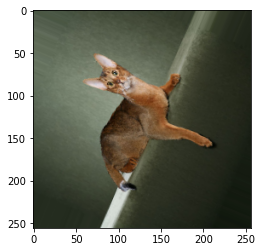

In [0]:
x,y = next(generator.flow_from_directory('cat',batch_size=1))
plt.imshow(x[0].astype('uint8'));

**uint8** is used unsigned 8 bit integer. And that is the range of pixel. We can't have pixel value more than 2^8 -1. Therefore, for images uint8 type is used. Whereas double is used to handle very big numbers.

In [0]:
generator=tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range = [-50,-10,0,10,20],
    height_shift_range=[-10,0,50],
    
)

Found 1 images belonging to 1 classes.


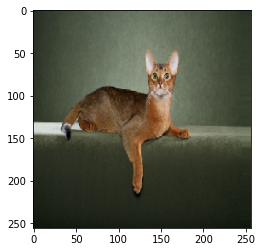

In [0]:
x,y=next(generator.flow_from_directory('cat',batch_size=1))
plt.imshow(x[0].astype('uint8'))

Found 1 images belonging to 1 classes.


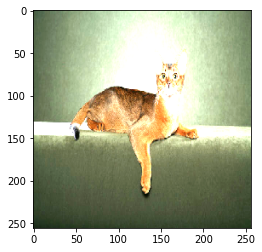

In [0]:
generator= tf.keras.preprocessing.image.ImageDataGenerator(
    brightness_range=(2,3.0)
)
x,y=next(generator.flow_from_directory('cat',batch_size=1))
plt.imshow(x[0].astype('uint8'))

Found 1 images belonging to 1 classes.


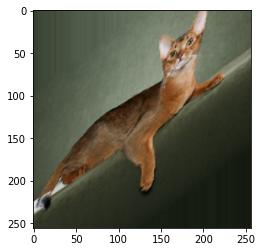

In [0]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    shear_range=50
)
x,y =next(generator.flow_from_directory('cat',batch_size=2))
plt.imshow(x[0].astype('uint8'))

Found 1 images belonging to 1 classes.


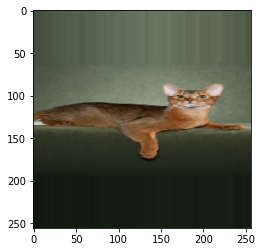

In [0]:
generator=tf.keras.preprocessing.image.ImageDataGenerator(
    zoom_range=[0.5,2.0]
)
x,y=next(generator.flow_from_directory('cat',batch_size=1))
plt.imshow(x[0].astype('uint8'))

In [0]:
np.array(Image.open('/content/cat/train/cat/cat.jpg')).mean()

69.57810416666666

Found 1 images belonging to 2 classes.


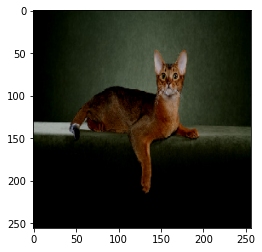

In [0]:
generator= tf.keras.preprocessing.image.ImageDataGenerator(
    channel_shift_range= 100
)
x,y = next(generator.flow_from_directory('cat',batch_size=1))
plt.imshow(x[0].astype('uint8'))

In [0]:
x.mean()

24.715097

Found 1 images belonging to 2 classes.


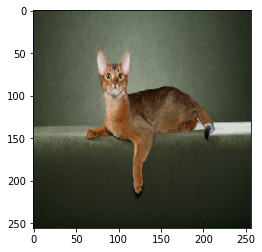

In [0]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip = True,
    vertical_flip = True
)
x,y = next(generator.flow_from_directory('cat',batch_size=1))
plt.imshow(x[0].astype('uint8'))

In [0]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center = True,
    featurewise_std_normalization = True
)
generator.fit(x_train)

170500096/170498071 [==============================] - 4s 0us/step


0.6175643 0.8502731 [[8]]
120.70756512369792


array([5], dtype=uint8)

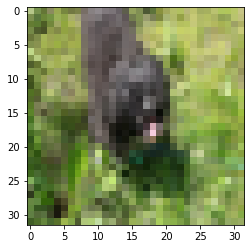

In [0]:
x,y = next(generator.flow(x_train,y_train,batch_size=1))
print(x.mean(),x.std(),y)
print(x_train.mean())

i = np.random.randint(1, len(x_train))
plt.imshow(x_train[i])
y_train[i]

In [0]:
generator=tf.keras.preprocessing.image.ImageDataGenerator(
    samplewise_center = True,
    samplewise_std_normalization = True
)
x,y = next(generator.flow(x_train,y_train,batch_size=1))
print(x.mean(),x.std(),y)

6.45717e-08 1.0 [[3]]


In [0]:
generator= tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1.,
    preprocessing_function = tf.keras.applications.mobilenet_v2.preprocess_input
)
x,y = next(generator.flow(x_train,y_train,batch_size=1))
print(x.mean(),x.std(),y)

0.21422847 0.6379873 [[7]]


In [0]:
generator= tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function = tf.keras.applications.mobilenet_v2.preprocess_input,
    horizontal_flip =  True,
    rotation_range = 40)

In [0]:
model = tf.keras.Sequential([tf.keras.applications.mobilenet_v2.MobileNetV2(
    include_top = False,
    input_shape = (32,32,3),
    pooling = 'avg'),
    tf.keras.layers.Dense(10,activation='softmax')
    ])
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [0]:
_ =  model.fit(
    generator.flow(x_train,y_train,batch_size=32),
    epochs = 10,
    steps_per_epoch = 10                  
                   
)

Epoch 1/10
10/10 [==============================] - 2s 234ms/step - loss: 3.1263 - accuracy: 0.0656
Epoch 2/10
10/10 [==============================] - 2s 235ms/step - loss: 2.9846 - accuracy: 0.0750
Epoch 3/10
10/10 [==============================] - 2s 229ms/step - loss: 2.5272 - accuracy: 0.1094
Epoch 4/10
10/10 [==============================] - 2s 232ms/step - loss: 2.3352 - accuracy: 0.0906
Epoch 5/10
10/10 [==============================] - 2s 229ms/step - loss: 2.3658 - accuracy: 0.0938
Epoch 6/10
10/10 [==============================] - 2s 232ms/step - loss: 2.1668 - accuracy: 0.1031
Epoch 7/10
10/10 [==============================] - 2s 229ms/step - loss: 1.9962 - accuracy: 0.0906
Epoch 8/10
10/10 [==============================] - 2s 228ms/step - loss: 1.9965 - accuracy: 0.0719
Epoch 9/10
10/10 [==============================] - 2s 229ms/step - loss: 2.0723 - accuracy: 0.0344
Epoch 10/10
10/10 [==============================] - 2s 232ms/step - loss: 2.1405 - accuracy: 0.1063